In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

In [38]:
dataset_training = pd.read_csv('./data/GOOG_train.csv')
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,555.647278,556.788025,552.060730,554.481689,554.481689,3656400
1,2014-01-03,555.418152,556.379578,550.401978,550.436829,550.436829,3345800
2,2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551800
3,2014-01-07,560.399475,567.717041,558.486633,567.303589,567.303589,5124300
4,2014-01-08,570.860291,571.517822,564.528992,568.484192,568.484192,4501700


In [39]:
training_data = dataset_training[['Open']].values
training_data

array([[ 555.647278],
       [ 555.418152],
       [ 554.42688 ],
       ...,
       [1017.150024],
       [1049.619995],
       [1050.959961]])

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)
training_data_scaled

array([[0.08017394],
       [0.07987932],
       [0.07860471],
       ...,
       [0.67359064],
       [0.71534169],
       [0.71706467]])

In [41]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
seed = 1
np.random.seed(seed)
random.set_random_seed(seed)
model = Sequential()

In [44]:
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 100, return_sequences = True))
model.add(LSTM(units = 100, return_sequences = True))
model.add(LSTM(units = 100))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0192
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0024
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 8/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0019
Epoch 9/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0018
Epoch 10/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0015
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [45]:
dataset_testing = pd.read_csv("./data/GOOG_test.csv")
actual_stock_price = dataset_testing[['Open']].values
actual_stock_price

array([[1016.570007],
       [1041.      ],
       [1032.589966],
       [1071.5     ],
       [1076.109985],
       [1081.650024],
       [1067.660034],
       [1063.180054],
       [1046.920044],
       [1050.170044],
       [1080.      ],
       [1079.469971],
       [1100.      ],
       [1088.      ],
       [1077.349976],
       [1076.47998 ],
       [1085.      ],
       [1080.109985],
       [1072.680054],
       [1068.430054],
       [1103.      ]])

In [46]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+len(dataset_testing)+1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

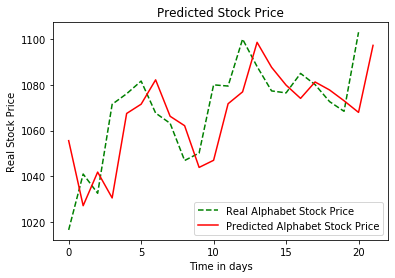

In [47]:
plt.plot(actual_stock_price, color = 'green', label = 'Real Alphabet Stock Price',ls='--')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Alphabet Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()